In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
from sklearn.datasets import load_boston
boston = load_boston() # boston 데이터 로드
bos = pd.DataFrame(boston.data, columns = boston.feature_names)
bos['Price'] = boston.target
bos.head()

C:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the 

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [3]:
corr = bos.corr()
corr['Price'].sort_values(ascending = False)

Price      1.000000
RM         0.695360
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
AGE       -0.376955
RAD       -0.381626
CRIM      -0.388305
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
LSTAT     -0.737663
Name: Price, dtype: float64

In [4]:
from sklearn import preprocessing
data = preprocessing.scale(bos.drop(columns = ['Price']))
y = preprocessing.scale(bos['Price']) #target값 스케일링

In [5]:
x = np.c_[np.ones(data.shape[0]), data] #[상수항(1), 전체변수]

In [6]:
alpha = 0.0001 #learning rate = 0.0001
m = y.size # 개수 - 506개
np.random.seed(10)
theta = np.random.rand(14) #0~1 사이의 난수 14개 생성 (파라미터 초기값)
def gradient_descent(x, y, m, theta, alpha):
    cost_list = []
    theta_list = []
    prediction_list = []
    gradient_list = []
    run = True
    cost_list.append(1e10) #cost 초기값 = 10의 10승
    i = 0
    while run: #run이 True일 경우
        prediction = np.dot(x, theta) #벡터 x와 벡터 theta 간의 내적으로 예측치 계산
        prediction_list.append(prediction) #예측치 기록
        error = prediction - y #예측치와 실제값의 오차 계산
        cost = 1/(2*m) * np.dot(error.T, error) # 오차 제곱합을 2m으로 나눔 (gradient descent를 위해 편의상 2m으로 설정)
        cost_list.append(cost) #cost 기록
        if len(theta_list) == 0: #파라미터 초기값으로 1회 수행
            gradient = - (1/m) * np.dot(x.T, error)
            theta = theta - (alpha * (1/m) * np.dot(x.T, error)) #파라미터 업데이트
            theta_list.append(theta) #파라미터 기록
            gradient_list.append(gradient) #gradient 기록
        elif len(theta_list) != 0: #모멘텀을 반영한 그래디언트 생성
            before_gradient = gradient_list[-1]
            beta = 0.5
            new_gradient = beta * before_gradient - (1-beta) * (1/m) * np.dot(x.T, error)
            theta = theta + alpha * new_gradient #파라미터 업데이트
            theta_list.append(theta) #파라미터 기록
            gradient_list.append(new_gradient) #gradient 기록
            
        if cost_list[i] - cost_list[i+1] < 1e-9: #현재 cost와 전단계 cost 차이가 작으면 수렴이므로 중단
            run = False
        
        i += 1
    cost_list.pop(0) #초기 cost값 기록 삭제
    return prediction_list, cost_list, theta_list

In [7]:
prediction_list, cost_list, theta_list = gradient_descent(x, y, m, theta, alpha)
theta = theta_list[-1] #마지막 수렴된 파라미터 벡터 저장

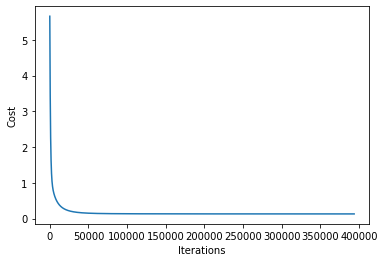

In [8]:
plt.plot(cost_list)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show() #반복에 따른 cost 그래프 시각화

In [9]:
y_pred = theta[0] + theta[1] * x[:, 1] + theta[2] * x[:, 2] + theta[3] * x[:, 3] + theta[4] * x[:, 4] + theta[5] * x[:, 5] + theta[6] * x[:, 6] + theta[7] * x[:, 7] + theta[8] * x[:, 8] + theta[9] * x[:, 9] + theta[10] * x[:, 10] + theta[11] * x[:, 11] + theta[12] * x[:, 12] + theta[13] * x[:, 13] #최종 파라미터 벡터로 선형식 구성하고 예측값 산출

MSE_e = ((y_pred-y)**2).mean() #선형식에 의한 오차제곱 평균 계산
MSE_GD = ((prediction_list[-1]-y)**2).mean() #gradient descent에 의한 오차제곱 평균 계산

print('선형회귀에 의한 MSE : {}'.format(round(MSE_e, 7)))
print('gradient descent에 의한 MSE : {}'.format(round(MSE_GD, 7)))

선형회귀에 의한 MSE : 0.2595147
gradient descent에 의한 MSE : 0.2595147
